In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

                 

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("atharvasoundankar/shifting-seas-ocean-climate-and-marine-life-dataset")

print("Path to dataset files:", path)

g:\CS109\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\josep\.cache\kagglehub\datasets\atharvasoundankar\shifting-seas-ocean-climate-and-marine-life-dataset\versions\1


In [4]:
df = pd.read_csv("realistic_ocean_climate_dataset.csv")

In [5]:
df.head()

,Date,Location,Latitude,Longitude,SST (°C),pH Level,Bleaching Severity,Species Observed,Marine Heatwave
0,2015-01-01,Red Sea,20.0248,38.4931,29.47,8.107,NaN,106,False
1,2015-01-07,Great Barrier Reef,-18.2988,147.7782,29.65,8.004,High,116,False
2,2015-01-14,Caribbean Sea,14.9768,-75.0233,28.86,7.947,High,90,False
3,2015-01-20,Great Barrier Reef,-18.3152,147.6486,28.97,7.995,Medium,94,False
4,2015-01-27,Galápagos,-0.8805,-90.9769,28.60,7.977,NaN,110,False


In [6]:
df = df.drop(["Date","Location", "Longitude", "Latitude"], axis=1).dropna()

x = df.drop(["Species Observed"], axis=1)
y = df["Species Observed"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
try:
    test_model = LinearRegression().fit(x_train, y_train)
except Exception as e:
    print("Error: ", e)


Error:  could not convert string to float: 'Low'


In [8]:
numeric_features = df.drop("Species Observed", axis=1).select_dtypes(include='number').columns.tolist()
categoric_features = df.drop("Species Observed", axis=1).select_dtypes(exclude='number').columns.tolist()

In [9]:
model1 = LinearRegression().fit(x_train[numeric_features], y_train)

train_score = model1.score(x_train[numeric_features], y_train)
test_score = model1.score(x_test[numeric_features], y_test)

print("Train R2:", train_score)
print("Test R2:", test_score)

Train R2: 0.45560291411670606
Test R2: 0.37901357199172114


Now I need to train a model that uses catagorical data


In [10]:
x_train_design = pd.concat(
    [
        x_train[numeric_features],
        pd.get_dummies(x_train[categoric_features])
    ],
    axis=1
)

x_test_design = pd.concat(
    [
        x_test[numeric_features],
        pd.get_dummies(x_test[categoric_features])
    ],
    axis=1
)

In [11]:
x_test_design.dtypes

SST (°C)                     float64
pH Level                     float64
Marine Heatwave                 bool
Bleaching Severity_High         bool
Bleaching Severity_Low          bool
Bleaching Severity_Medium       bool
dtype: object

In [12]:
model2 = LinearRegression().fit(x_train_design, y_train)

train_score = model2.score(x_train_design, y_train)
test_score = model2.score(x_test_design, y_test)

print("Train R2:", train_score)
print("Test R2:", test_score)

Train R2: 0.45892180264304205
Test R2: 0.35896544159215193


In [13]:
coefs = pd.DataFrame(model2.coef_, index=x_train_design.columns, columns=["beta_value"])
coefs

,beta_value
SST (°C),-8.825227
pH Level,5.309369
Marine Heatwave,-4.412260
Bleaching Severity_High,-0.071697
Bleaching Severity_Low,-0.378663
Bleaching Severity_Medium,0.450360


[Text(0.5, 1.0, 'Model coefficients')]

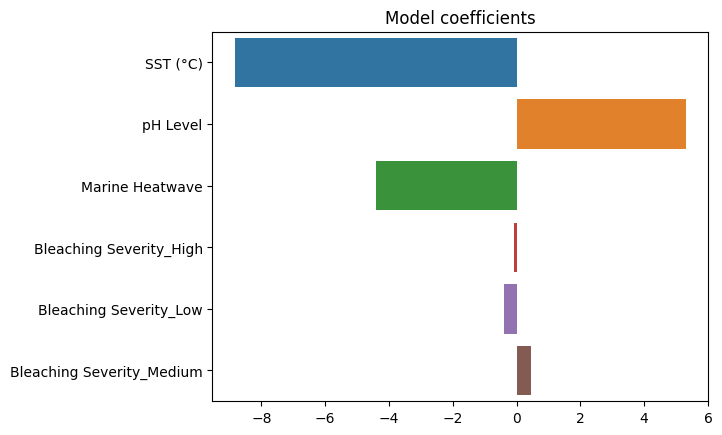

In [29]:
sns.barplot(data=coefs.T, orient='h').set(title="Model coefficients")

In [ ]:
x_space = np.linspace(x[""])

In [14]:
x_train_design.corr()

,SST (°C),pH Level,Marine Heatwave,Bleaching Severity_High,Bleaching Severity_Low,Bleaching Severity_Medium
SST (°C),1.000000,-0.562979,0.688050,0.017731,-0.032813,0.016296
pH Level,-0.562979,1.000000,-0.406585,-0.056083,0.042318,0.009181
Marine Heatwave,0.688050,-0.406585,1.000000,0.024416,-0.001450,-0.020765
Bleaching Severity_High,0.017731,-0.056083,0.024416,1.000000,-0.446731,-0.467800
Bleaching Severity_Low,-0.032813,0.042318,-0.001450,-0.446731,1.000000,-0.581758
Bleaching Severity_Medium,0.016296,0.009181,-0.020765,-0.467800,-0.581758,1.000000


g:\CS109\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, "('R2:', 0.3122220223675435)")

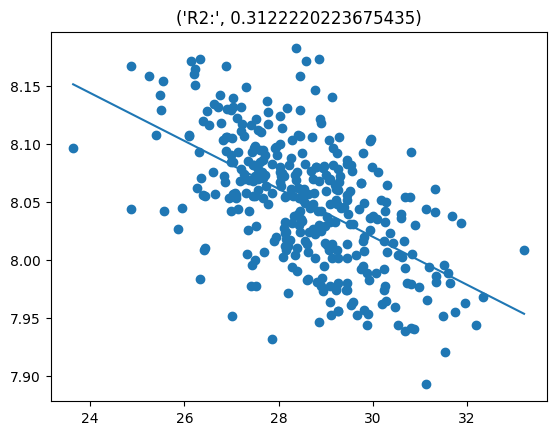

In [ ]:
model3 = LinearRegression().fit(df[["SST (°C)"]], df["pH Level"])

x_space = np.linspace(df["SST (°C)"].min(), df["SST (°C)"].max(), 100).reshape(-1,1)

y_predict = model3.predict(x_space)

plt.scatter(df["SST (°C)"], df["pH Level"])
plt.plot(x_space, y_predict)


plt.title(("R2:", model3.score(df[["SST (°C)"]], df["pH Level"])))